# Assignment 1 - Jonathan Boel Nielsen

In [1]:
#Pytorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torchsummary import summary

#Sci-kit learn
import sklearn.model_selection

#Numpy
import numpy as np

#Matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors

#IPython
from IPython.display import clear_output

#Dataset dependencies
import os
import pandas as pd
from torchvision.io import read_image

#glob
import glob

#opencv2
import cv2

# Part 1

### In your opinion, what were the most important turning points in the history of deep learning?
The first turning point that essentially started the field of machine learning and deep learning was the invention of the perceptron by Rosenblatt in 1958. While this invention seems very separate from the very advanced implementation and construction of neural networks today, it has been the initial kickstart that led to our current deep learning progress. The perceptron was capable of classifying linearly separable variables, but only between in two classes outputting either 0 or 1.

The second important turning point happened when Paul Werbos proposed the usefulness of backpropagation in neural nets in 1974. The concept of backpropagation in neural networks allows a network to optimize the weights by backpropagating the error through the network and updating the weights each iteration. The lack of academic interest in neural networks meant that the backpropagation method was not popularized until a decade later in 1986. 

The third important turning point was caused by the invention of the Boltzmann Machines as a learning algorithm. A Boltzmann machine unlike the perceptron provides stochastic outputs, so a neural network could provide its confidence of an input belonging to each class, and the sum of all these probabilities will sum to 1.

The fourth important turning point occured in 1989. Combining backpropagation and Boltzmann Machines, LeCun et al. created a neural network capable of recognizing handwritten zip-codes. This not only proved the usefulnes of backpropagation, but also showed a new method that would be useful for all further deep learning applications, the convolution neural net (CNN).

The fifth important turning point was the invention of the recurrent neural network (RNN) since it allowed neural networks to recognize time-dependent data such as speech. This method used error backpropagation through time and allowed for neurons to reccurently output into nodes further back in the network or even back into their own input.

The sixth important turning point was the creation of big datasets, such as the WordNET dataset in 2009 and the ImageNET dataset, which allowed for benchmarking and efficient training.

The seventh important turning point was the realization that the ReLU activation function was in most cases the best performer i deep neural networks, and that the random initialization of weights was not optimal, but their layer placement in the neural network should be considered.

The eight important turning point was the invention of dropout, a method useful for preventing overfitting and preventing co-adaptation of feature detectors. This method massively improved the testing accuracy on the ImageNet dataset.

### Explain the ADAM optimizer
ADAM is a learning algorithm. In deep learning it is known as one of the most robust and effective optimization algorithms. It utilizes stochastic gradient descent, which is computationally efficient because we only need $\mathcal{O}$(1) computations each rather than the $\mathcal{O}$(n) (n being the number of traing data examples) computations needed for regular gradient descent for each independent variable iteration. The stochastic gradient is an ubiased estimator which acts on average as a good estimate of the gradient, so it is both accurate enough and much more computationally efficient. To further improve upon the stochastic gradient descent, ADAM draws inspiration from two other stochastic gradient descent extensions, AdaGrad and RMSProp. ADAM makes use of both the average first moment as used in AdaGrad and also the average of the second moments of the gradients as in RMSProp. It specifucally calculates the biased first moment and the biased second raw moment from the gradients, using $\beta_1$ and $\beta_2$ to control their decay rates. It then computes the bias-corrected moment estimates because initialization bias can cause discrepancy between the expected value of the exponential moving averages and the true second moment. This is corrected by dividing the biased moment estimates with $(1-\beta^t_1)$ and $(1-\beta^t_2)$ respectively. 

### Assume data input is a single 30x40 pixel image. First layer is a convolutional layer with 5 filters, with kernel size 3x2, step size (1,1) and padding='valid'. What are the output dimensions?
The input as described is a single input with a single channel of a 30x40 image. The input dimension are thus in tensor form $shape_{in}=(1,1,30,40)$. The input is fed through a convolutional layer with 5 filters, producing 5 output channels for our image, and the kernel size is 3x2 with step size 1,1 and valid padding. Valid padding means no padding is applied to the image, so in this case the output image will be smaller in both dimension due to the kernel size 3x2. The output image will have dimension 28,39 as the odd size of the first dimension of the kernel will remove one pixel from each side of the image, and the even size of the second dimension of the kernel will remove only one pixel in total.
The output shape will then be $shape_{out}=(1,5,28,39)$

To futher prove this point the convolutional layer is applied to a random input of the provided shape, and the output tensor shape will be provided

In [2]:
m = nn.Conv2d(in_channels=1,out_channels=5,kernel_size=(3,2),stride=(1,1),padding='valid')
X = torch.randn(1,1,30,40)
out = m(X)
print(out.shape)

torch.Size([1, 5, 28, 39])


It is evident here that the output shape is indeed $shape_{out}=(1,5,28,39)$

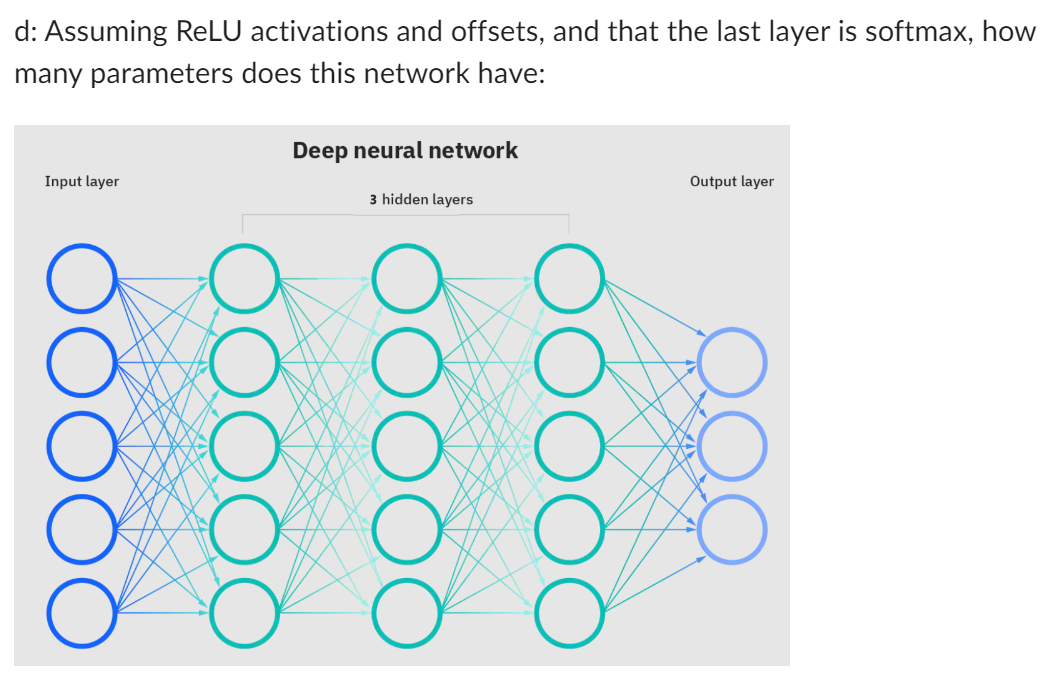

Neither the ReLU activation function or the softmax adds parameters to the network. Only the fully connected layers have parameters where the parameters between each layer is equal to the product of neurons in each of the two layers. The network structure is four layers of 5 neurons followed by an output layer of 3 neurons, with each layer having an offset/bias adding an extra neuron to each layer, which is only connected to the following layer. Thus each interconnection of the first four layers will provide $6*5=30$ parameters, and with the final layer having only 3 neurons the contribution there will be $6*3=18$ parameters. In total this will add up to $30*3+18=108$ parameters for the provided network.

The code below calculates the number of parameters of the network with the given structure.

In [3]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        #Linear Layers
        self.Linear1 = nn.Linear(in_features=5, out_features=5, bias=True)
        self.Linear2 = nn.Linear(in_features=5, out_features=3, bias=True)

        #Activation Functions
        self.ReLU = nn.ReLU(inplace=True)

        #Flattening Function
        self.flatten = nn.Flatten()

        #Softmax function
        self.softmax = nn.Softmax(dim=0)

    def forward(self, x):
        x = self.flatten(x)
        x = self.Linear1(x)
        x = self.ReLU(x)
        x = self.Linear1(x)
        x = self.ReLU(x)
        x = self.Linear1(x)
        x = self.ReLU(x)
        x = self.Linear2(x)

        logits = self.softmax(x)

        return logits

model = NeuralNetwork()
X = torch.randn(1,1,5,1)
summary(model, input_size=(1, 5, 1), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                    [-1, 5]               0
            Linear-2                    [-1, 5]              30
              ReLU-3                    [-1, 5]               0
            Linear-4                    [-1, 5]              30
              ReLU-5                    [-1, 5]               0
            Linear-6                    [-1, 5]              30
              ReLU-7                    [-1, 5]               0
            Linear-8                    [-1, 3]              18
           Softmax-9                    [-1, 3]               0
Total params: 108
Trainable params: 108
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
---------------------------------------------------

This further acknowledges that there are a total of 108 parameters in the network.

### For a given minibatch, the targets are [1,4,5,8] and the network output is [0.1,4.4,0.2,10]. If the loss function is "torch.nn.HuberLoss(reduction='mean',delta=1.0)", what is the loss for this minibatch
Huber loss is calculated using:

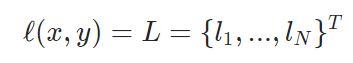

with

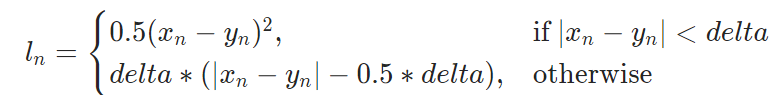


and then because the reduction method is mean, we take the mean of the losses.

The following code exemplifies the question and determines the loss for the given minibatch.

In [114]:
x = np.array([1,4,5,8])
y = np.array([0.1,4.4,0.2,10])
xy = np.abs(x-y)
delta = 1.0
ld = []
for i in range(len(xy)):
    if xy[i] < delta:
        ld.append(0.5*(xy[i])**2)
    else:
        ld.append(delta*(xy[i]-0.5*delta))
huber_ld = np.mean(ld)
print('huber_loss = ',huber_ld)

huber_loss =  1.57125


The total loss of the Huber Loss function is 1.5713 for the given minibatch.

# Part 2

This dataset accesses the image data and the labels corresponding to the image and feeds it to the training data loader. Importantly the dataset class ensures that all images are resized to the same shape, and it reindexes the columns of the read csv file to fit the standard format of the torch custom image dataset example class.

In [101]:
class InsectDataset(Dataset):
    def __init__(self, transform=None, target_transform=None):
        self.img_labels = pd.read_csv("data/insects/insects.csv")
        order = ['filename','species','sample']
        self.img_labels = self.img_labels.reindex(columns=order)
        self.img_dir = "data/insects/insects_img/"
        self.transform = transform
        self.target_transform = target_transform
        self.img_dim = (520,520)
    
    def __len__(self):
        return len(self.img_labels)
    

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = cv2.imread(img_path)
        image = cv2.resize(image, self.img_dim)
        image = np.array([image[:,:,2],image[:,:,1],image[:,:,0]]).transpose(1,2,0)
        label = self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [102]:
#Tester
transform = transforms.Compose([transforms.ToTensor()])
batch_size = 4
# Set up the dataset.
dataset = InsectDataset()
# Set up the dataset.
trainloader = torch.utils.data.DataLoader(dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

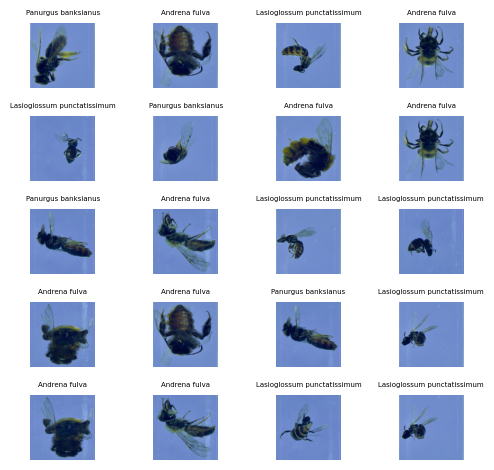

In [104]:
# get some images
dataiter = iter(trainloader)
images, labels = next(dataiter)
for i in range(5): #Run through 5 batches
    images, labels = next(dataiter)
    sub_k = 0
    for image, label in zip(images,labels): # Run through all samples in a batch
        sub_k = sub_k + 1
        ax = plt.subplot(5,5,5*i+sub_k)
        plot_image = image.numpy()
        ax.imshow(plot_image)
        ax.set_title(label,fontsize=5)
        ax.set_axis_off()

plt.tight_layout()


The custom dataset works and feeds the images and labels to the tester, and correctly sets the r,g and b channels.

# Part 3
### Describe & visualize the data
First i will load in and visualize the data, then i will describe it.

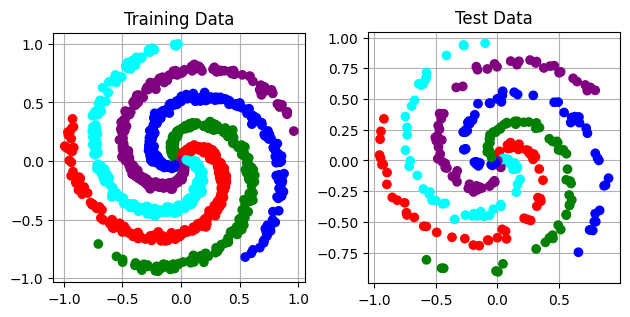

In [6]:
training_data = pd.read_csv('data/a1_data/trainData.csv',sep=';')
test_data = pd.read_csv('data/a1_data/testData.csv',sep=';')

labels_tr = torch.tensor(training_data['label'].values,dtype=torch.long)
data_tr = torch.tensor(training_data[['x','y']].values,dtype=torch.float32)


labels_te = torch.tensor(test_data['label'].values,dtype=torch.long)
data_te = torch.tensor(test_data[['x','y']].values,dtype=torch.float32)


colors = ['red','green','blue','purple','cyan']

ax = plt.subplot(1,2,1)
plt.grid()
ax.set_aspect('equal',adjustable='box')
ax.set_title('Training Data')
plt.scatter(data_tr[:,0],data_tr[:,1], c=labels_tr, cmap=matplotlib.colors.ListedColormap(colors),zorder=2)
ax = plt.subplot(1,2,2)
plt.grid()
ax.set_aspect('equal',adjustable='box')
ax.set_title('Test Data')
plt.scatter(data_te[:,0],data_te[:,1], c=labels_te, cmap=matplotlib.colors.ListedColormap(colors),zorder=2)
plt.tight_layout()
plt.show()

The datasets consists of two dimensional data points with corresponding classification labels. In total there are 5 labels classified from 0 to 4. The data shows spiraling arms rotating around origo, similarly to how stars in the milky way are positiones around its center.

### Describe your network
The model used for training with this dataset is written in code below:

In [7]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.Linear1 = nn.Linear(in_features=2,out_features=256)
        self.Linear2 = nn.Linear(in_features=256,out_features=128)
        self.Linear3 = nn.Linear(in_features=128,out_features=64)
        self.Linear4 = nn.Linear(in_features=64,out_features=32)
        self.Linear5 = nn.Linear(in_features=32,out_features=5)

        #Activation Functions
        self.ReLU = nn.ReLU(inplace=True)

        #Softmax Function
        self.softmax = nn.Softmax(dim=1)

        #Dropout Function
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = self.Linear1(x)
        x = self.ReLU(x)
        x = self.Linear2(x)
        x = self.dropout(x)
        x = self.ReLU(x)
        x = self.dropout(x)
        x = self.Linear3(x)
        x = self.ReLU(x)
        x = self.dropout(x)
        x = self.Linear4(x)
        x = self.ReLU(x)
        logits = self.Linear5(x)

        return logits
device = (
    "cuda" if torch.cuda.is_available()
     else "cpu"
)
print(f"Using {device} device")
model = NeuralNetwork().to(device)
summary(model, input_size=(1, 1, 2))

Using cuda device
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 1, 1, 256]             768
              ReLU-2            [-1, 1, 1, 256]               0
            Linear-3            [-1, 1, 1, 128]          32,896
           Dropout-4            [-1, 1, 1, 128]               0
              ReLU-5            [-1, 1, 1, 128]               0
           Dropout-6            [-1, 1, 1, 128]               0
            Linear-7             [-1, 1, 1, 64]           8,256
              ReLU-8             [-1, 1, 1, 64]               0
           Dropout-9             [-1, 1, 1, 64]               0
           Linear-10             [-1, 1, 1, 32]           2,080
             ReLU-11             [-1, 1, 1, 32]               0
           Linear-12              [-1, 1, 1, 5]             165
Total params: 44,165
Trainable params: 44,165
Non-trainable params: 0
---------------

Since only two inputs are given, we need to have some hidden layers that expand to get more parameters. The layer structure consists of an input layer of size 2, followed by 4 hidden layers of size 256, 128, 64 and 32 respectively. The output layer is of size 5 to produce the 5 outputs needed for this classification problem. Stochastic gradient descent is used in the loss function, so we do not need to use softmax at the end of the network, as it would then be applied twice which would cause unwanted high loss. Between each layer is a ReLU activation function and also a dropout function with probability 0.2 to prevent coadaptation of feature detectors, which is not really a problem in this case but it also helps prevent overfitting which is nice.

### Describe your training strategy

In [8]:
device = (
    "cuda" if torch.cuda.is_available()
     else "cpu"
)
print(f"Using {device} device")

batch_size = 32

train_dataset = TensorDataset(data_tr,labels_tr)
test_dataset = TensorDataset(data_te,labels_te)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


Using cuda device


In [9]:

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []



def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    total_loss, correct = 0, 0

    for _, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)


        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        total_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Calculate accuracy
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    avg_loss = total_loss / len(dataloader)  # Calculate average loss for the epoch
    avg_accuracy = correct / size

    train_losses.append(avg_loss)  # Store the average loss for the epoch
    train_accuracies.append(avg_accuracy) # Store the average accuracy for the epoch

    print(f"Train loss: {avg_loss:>7f}, Accuracy: {(100*avg_accuracy):>0.1f}%")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    test_losses.append(test_loss)  # Store the test loss for the epoch
    test_accuracies.append(correct)

    print(f"Test Error: \n Avg loss: {test_loss:>8f}, Accuracy: {(100*correct):>0.1f}% \n")


In [63]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

model = NeuralNetwork().to(device)

learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

epochs = 200


for t in range(epochs):
    eps = t+1
    if t % 4 == 0:
        clear_output(wait=True)
    print(f"Epoch {t+1}\n-------------------------------")
    print('lr = ',scheduler.get_last_lr())
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
    scheduler.step()
    if t > 25:
        loss_var = np.var(test_losses[-25:])
        mean_loss = np.mean(test_accuracies[-25:])
        if (loss_var < 0.00001) & (mean_loss> 0.985):
            print('Test loss has converged, breaking the loop')
            break
print("Done!")

Epoch 97
-------------------------------
lr =  [6.25e-05]
Train loss: 0.057574, Accuracy: 97.9%
Test Error: 
 Avg loss: 0.035804, Accuracy: 99.3% 

Test loss has converged, breaking the loop
Done!


When training the network we are interested in the choice of loss function and optimizer as well as learning rate and batch size. For the loss function, cross entropy loss is chosen, which one-hot encodes the labels and calculates a loss function with a stochastic representation of the model predictions. For this type of classification it is always better to consider the models stochastic certainty in an answer rather than just considering the most probable answer as a 100% certainty, as it allows for better loss calculation and better parameter optimization. For the optimizer ADAM is used, since it is fast and efficient as explained previously in this assignment. To further improve upon the result, a variable step size is used, utilizing a learning rate scheduler called step LR, which reduces the learning rate by a factor 0.5 every 20 epochs. This will help smooth out the accuracy, as the dataset is quite small making the model prone to fluctuations in loss and accurary.

The training and testing loop runs for a maximum of 200 epochs, but if the results have converged both in terms of loss variance and mean loss over the last 25 epochs, the loop will be broken and we will assume that the model has converged.

### Describe your results and discuss the observed performance & visualize network performance

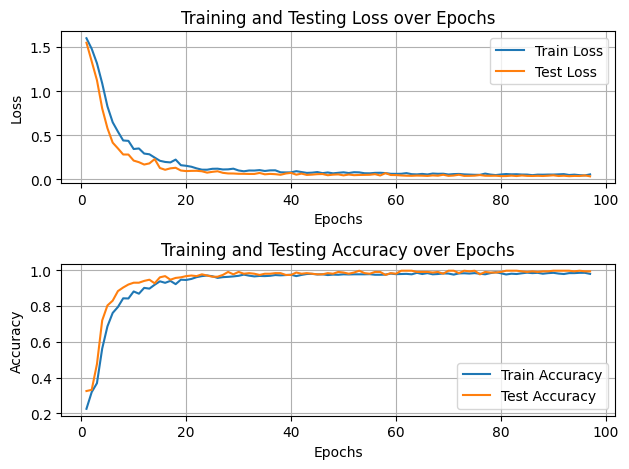

In [64]:
plt.subplot(2,1,1)
plt.plot(range(1, eps+1), train_losses, label="Train Loss")
plt.plot(range(1, eps+1), test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Testing Loss over Epochs")
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(range(1, eps+1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, eps+1), test_accuracies, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy over Epochs")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


With this model and training method we are able to achieve an accuracy of about 98.5% within 100 epochs of running the network. The variable learning rate helps achieve smooth loss and accuracy curves, and the added dropout to the network helps prevent overfitting and codependency. The network performs well, is robust and converges relatively quickly thanks to the ADAM optimizer. Within 40 epochs it is already over 90% accuracy and withing 100 it is close to perfect. The reason why the accuracy has trouble increasing above 98.5% is that the data is clustered tightly around the coordinate (0,0) where there are representative points from each class, making their distinction very difficult in our model. However it manages quite well as is evident in the two plots above and in the boundary plot below:

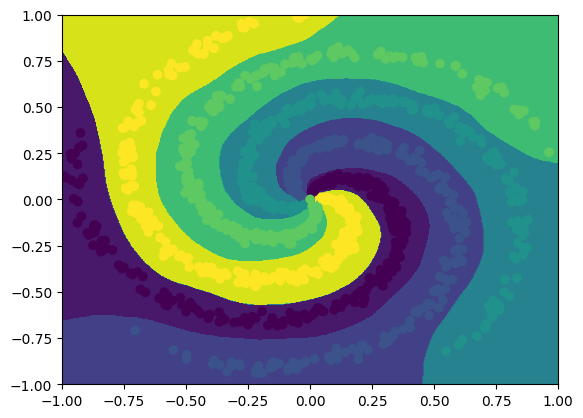

In [66]:
model.cpu()
res = 500
x,y = np.meshgrid(np.linspace(-1,1,res),np.linspace(-1,1,res))
xy = np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)
z = model(torch.tensor(xy).float()).detach().numpy()
z = np.argmax(z,1).reshape(res,res)
plt.contourf(x,y,z)
plt.scatter(data_tr[:,0],data_tr[:,1],c=labels_tr)
plt.show()

Again we can clearly see that the network has performed a good separation of classes with minimal outliers. The only place that is difficult to separate is around the center as we expected.